# Tap du lieu huan luyen mau 

In [28]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.rand(m,1)

[]

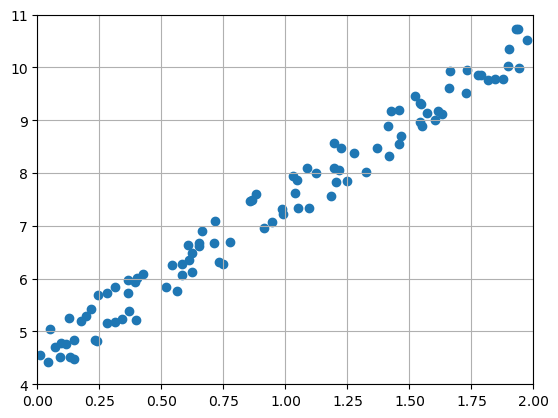

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlim([0,2])
plt.ylim([4,11])
plt.grid('True')
plt.plot()

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

## Solution for ordinary least squares :


Initial problem : Given domain D , we find the weighted vector w such that:

$$
w^{*} = argmin_{w}{\sum_{i=1}^{N} (y_i - w_0 - w_1x_{i1} - ... - w_nx_{in})^2}
$$

in other words, we have to find w such that it minimizes the RSS :

$$
f^{*} = argmin_{f \in H} RSS(f) = argmin_{f \in H} {||\mathbf{y} - X\mathbf{w}||_{2}^{2}}
$$

The solution for equation grad(f) = 0 is:
$$
\hat{w} = (X^{T} X)^{-1}X^{T}Y
$$


In [4]:
theta_best = np.linalg.inv( X_b.T @ X_b ) @ X_b.T @ y

In [5]:
theta_best

array([[4.51359766],
       [2.98323418]])

## Try the model from sklearn library

The LinearRegression() using a technical known as Singular Value Decomposition which fixes the case the matrix X.T @ X not be invertible

In [6]:
from sklearn.linear_model import LinearRegression # Signular Value Decomposition

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

# Batch Gradient Descent 

Gradient vector of the cost function :

$$
\nabla_{w} MSE(w) = \frac{2}{m}X^{T}(X\mathbf{w}-\mathbf{y})
$$

Gradient descent step : 
$$
w^{\text{next step}} = w - \eta \nabla_{w} MSE(w)
$$

In [8]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y )
    theta = theta - gradients * eta


In [9]:
theta

array([[4.51359766],
       [2.98323418]])

# Stochastic Gradient Descent

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ ( xi @ theta - yi )
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [11]:
theta

array([[4.51548062],
       [2.9775157 ]])

### Try the model SGDRegressor from sklearn library

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
# Run the code for maximum 1000 epochs or until the loss drop by less than 10^-5 during 100 epochs

sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.077121]), array([0.91374625]))

# Polynomial Regression

In [14]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

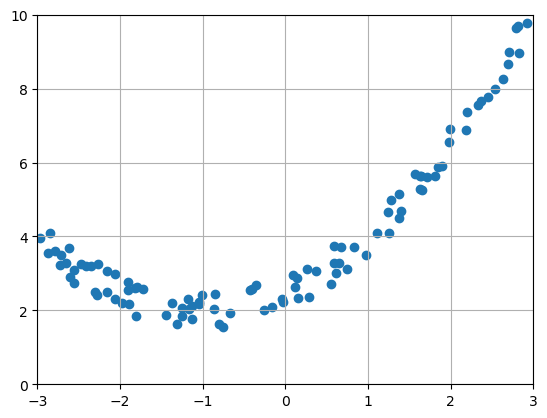

In [15]:
plt.scatter(X,y)
plt.xlim([-3,3])
plt.ylim([0,10])
plt.grid('True')
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [17]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

In [19]:
x_new = np.array([[1,1],[2,4]])
y_pred = lin_reg.predict(x_new)

In [20]:
y_pred

array([[3.99189835],
       [6.48527383]])

## Regularized Model

### Ridge Regression

Ridge Regression cost function :
$$
J(w) = MSE(w) + \lambda \sum_{i=1}^{n}w_i^{2}
$$

Ridge regression closed-form solution :
$$
\hat{w} = (X^{T}X + \lambda I)^{-1}X^{T}y
$$

In [23]:
ridge_theta_best = np.linalg.inv(X.T @ X + 0.1 * np.eye(m+1)) @ X.T @ y

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 101)